# Descriptive Analyses

Intro tables to give context to the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid",{'axes.spines.left' : False,
                           'axes.spines.right': False,
                           'axes.spines.top': False,
                           'grid.linestyle': ':'})
sns.set_context("talk")

STUDY_ID ="60b37265a9f60881975de69e"


In [2]:
participants = pd.read_csv(f"../data/processed/{STUDY_ID}-participants.csv")
posts = pd.read_csv(f"../data/processed/{STUDY_ID}-rumour-results.csv")
reshare_rates = pd.read_csv(f"../data/processed/{STUDY_ID}-reshare_rates.csv")
post_study = pd.read_csv(f"../data/processed/{STUDY_ID}-post-study-responses.csv")
print("Shape: {}x{}".format(*reshare_rates.shape))

Shape: 202x54


## Initial Tables

1. Participant statistics
2. Experiment descriptive statistics

### Participant statistics

In [3]:
from tableone import TableOne
categorical = ["educationLevel","politicalAffiliation","attendsProtests"] + [col for col in participants.columns if "gender" in col]
table_one = TableOne(participants.reset_index().drop(["user_id","timeSubmitted","consent"],
                                                     axis=1),
                                                     categorical = categorical)
table_one

Missing      Overall
n                                                                                                                       124
index, mean (SD)                                                                                             0  61.5 (35.9)
educationLevel, n (%)                                                                 communityCollege       0    17 (13.7)
                                                                                      doctorate                     2 (1.6)
                                                                                      graduateSchool              20 (16.1)
                                                                                      highSchool                  25 (20.2)
                                                                                      none                          2 (1.6)
                                                                                      undergrad                   58 (46.8)
politicalAffiliation, n (%)                                                           centre                 0    16 (12.9)
                                                                                      centreLeft                  39 (31.5)
                                                                                      centreRight                 14 (11.3)
                                                                                      left                        33 (26.6)
                                                                                      none                        14 (11.3)
                                                                                      right                         8 (6.5)
attendsProtests, n (%)                                                                False                  8    97 (83.6)
                                                                                      True                        19 (16.4)
age, mean (SD)                                                                                               0  32.0 (12.4)
gender_man, n (%)                                                                     0                      0    69 (55.6)
                                                                                      1                           55 (44.4)
gender_nonBinary, n (%)                                                               0                      0   120 (96.8)
                                                                                      1                             4 (3.2)
gender_woman, n (%)                                                                   0                      0    59 (47.6)
                                                                                      1                           65 (52.4)
affiliatedMovements_ Land Back, mean (SD)                                                                    0    0.0 (0.0)
affiliatedMovements_ women's equity (not "Gender"), mean (SD)                                                0    0.0 (0.0)
affiliatedMovements_Animal Welfare, mean (SD)                                                                0    0.0 (0.1)
affiliatedMovements_Animal rights, mean (SD)                                                                 0    0.0 (0.1)
affiliatedMovements_Anti-Extradition Law Amendment Bill Movement, mean (SD)                                  0    0.0 (0.0)
affiliatedMovements_Change animal cruelty laws , mean (SD)                                                   0    0.0 (0.1)
affiliatedMovements_Environmental, mean (SD)                                                                 0    0.0 (0.0)
affiliatedMovements_LGB rights (none of that other alphabet-soup nonsense), mean (SD)                        0    0.0 (0.0)
affiliatedMovements_Pro-choice, mean (SD)                                                                    0    0.0 (0.0)
affiliatedM

### Experiment descriptive statistics

In [4]:
table_two = TableOne(posts.drop(["user_id","timeSubmitted","rumour","evidence","code","posterId","id"],
                                              axis=1),
                     groupby=["condition","evidence"],
                     pval=True)
table_two

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grouped by condition                                                  
                                            Missing       Overall       control     treatment P-Value
n                                                            6888          3696          3192        
secondsTaken, mean (SD)                           0  102.1 (26.3)   99.5 (26.5)  105.2 (25.7)  <0.001
warning, n (%)          False                     0   5976 (86.8)  3696 (100.0)   2280 (71.4)  <0.001
                        True                           912 (13.2)                  912 (28.6)        
reshared, n (%)         False                     0   5772 (83.8)   3161 (85.5)   2611 (81.8)  <0.001
                        True                          1116 (16.2)    535 (14.5)    581 (18.2)        
clickedWarning, n (%)   False                     0   6859 (99.6)  3696 (100.0)   3163 (99.1)  <0.001
                        True                             29 (0.4)                    29 (0.9)        
timestamp, mean (SD)                              0   30.1 (17.1)   30.3 (17.1)   29.9 (17.0)   0.344
posterGender, n (%)     female                    0   3435 (49.9)   1788 (48.4)   1647 (51.6)   0.008
                        male                          3453 (50.1)   1908 (51.6)   1545 (48.4)

In [5]:
table_three = pd.pivot_table(reshare_rates,index="evidence",columns="condition",values="Affirms")
table_three

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition,Control,Treatment
evidence,,
High,0.17600,0.185106
Low,0.15283,0.136538


In [6]:
table_four = pd.pivot_table(reshare_rates,index="evidence",columns="condition",values="Denies")
table_four

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition,Control,Treatment
evidence,,
High,0.082000,0.114894
Low,0.284906,0.350000


In [7]:
table_five = reshare_rates.groupby(["condition","evidence"])[["Affirms",
                                                 "Denies",
                                                 ]].mean().T
table_five

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition Control           Treatment          
evidence     High       Low      High       Low
Affirms     0.176  0.152830  0.185106  0.136538
Denies      0.082  0.284906  0.114894  0.350000

### Other Basic Questions

1. How frequently do users click on the warning?

#### How frequently do users click on the warning?

In [8]:
treat = posts[(posts["condition"]=='treatment') & posts["warning"]].reset_index()
num_treat = len(treat["user_id"].unique())
clicked_warning = treat[treat["clickedWarning"]]
num_clicked = len(clicked_warning["user_id"].unique())
print(f"{100*(num_clicked/num_treat):.2f}% ({num_clicked}/{num_treat}) of participants in the treatment condition clicked a warning")


22.41% (13/58) of participants in the treatment condition clicked a warning


/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
print(f"Credibility indicators were only clicked on {100*len(clicked_warning)/len(treat):.2f}% ({len(clicked_warning)}/{len(treat)}) of the time")

Credibility indicators were only clicked on 3.18% (29/912) of the time


/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Sample Visualizations

## Hypotheses


The presence of credibility indicators in the system will:

- $H_1$: *decrease* the *affirmation rate* for rumours with lower evidence levels.
- $H_2$: *increase* the *denial rate* for rumours with lower evidence levels.
- $H_3$: *increase* the *affirmation rate* for rumours with higher evidence levels.
- $H_4$: *decrease* the *denial rate* for rumours with higher evidence levels.

**Some visualizations**

In [10]:
melted = reshare_rates.melt(id_vars=reshare_rates.columns[:-5],
                            value_vars=reshare_rates.columns[-5:-1],
                            var_name='code', 
                            value_name='reshared')
sorting_dict = {'Control': 0, 
                'Treatment': 1, 
                'Affirms': 0,
                'Denies': 1,
                'Neutral': 2,
                'Questions': 3,
                'High': 0,
                'Low': 1}
melted = melted.sort_values(by=['condition','code','evidence'],key=lambda x: x.map(sorting_dict))
af_di = melted[melted["code"].isin(["Affirms","Denies"])]

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


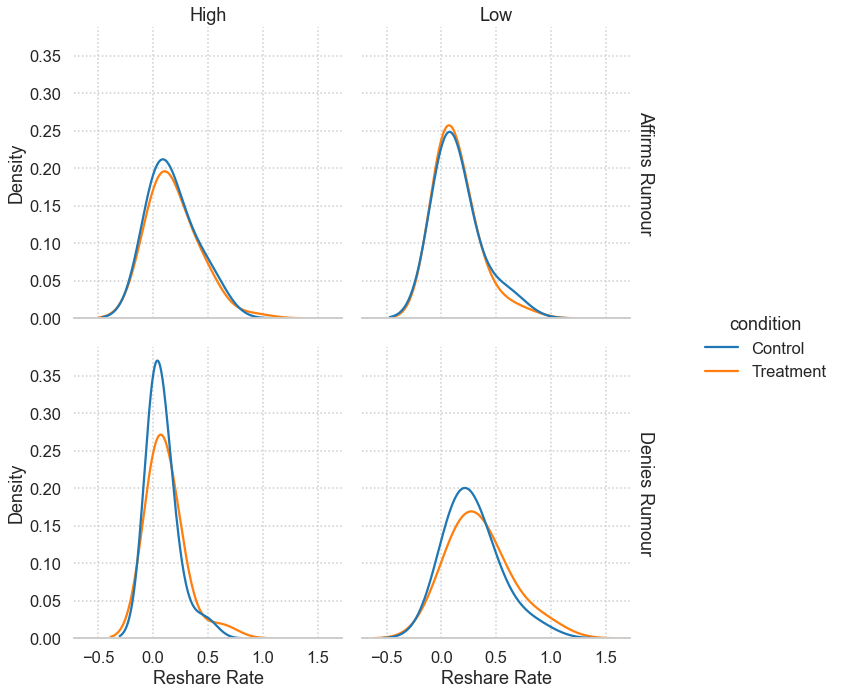

In [11]:
g = sns.displot(data=af_di, 
            x="reshared",
            hue="condition",
            col="evidence",
            row="code",
            bw_adjust=1.8,
            facet_kws={"margin_titles":True},
            kind="kde")
g.set_titles(col_template="{col_name}", row_template="{row_name} Rumour")
g.set_axis_labels(x_var="Reshare Rate")
sns.despine(left=True)
# g.fig.savefig("../figures/descriptive_analysis/reshare_rate-hist.pdf")

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


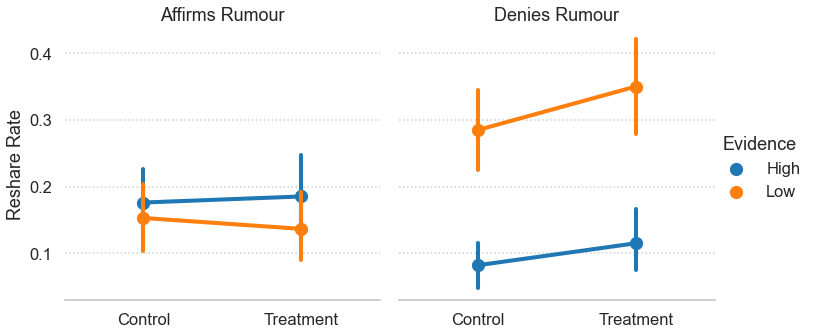

In [12]:
g = sns.catplot(data=af_di, 
            x="condition",
            y="reshared",
            hue="evidence",
            col="code",
            col_wrap=2,
            margin_titles=True,
            kind="point")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Reshare Rate",x_var="")
g._legend.set_title("Evidence")
sns.despine(left=True)
# g.savefig("../figures/descriptive_analysis/reshare_rate-point_plot.pdf")

**For seeing how to describe this plot. Look at Pennycook's Nature article.**

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


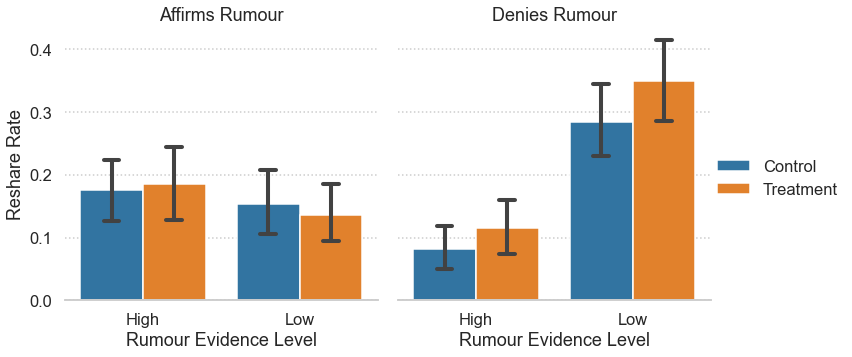

In [13]:
g = sns.catplot(data=af_di, 
            x="evidence",
            y="reshared",
            hue="condition",
            col="code",
            col_wrap=2,
            capsize=.1,
            margin_titles=True,
            kind="bar")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Reshare Rate",x_var="Rumour Evidence Level")
g._legend.set_title("")
sns.despine(left=True)
# g.savefig("../figures/descriptive_analysis/reshare_rate-bar_plot.pdf")

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


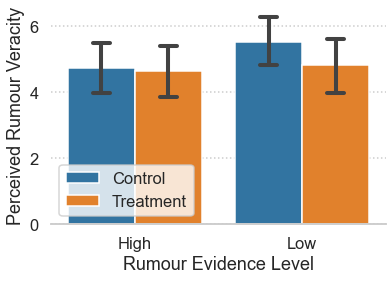

In [23]:
g = sns.barplot(data=reshare_rates, 
            x="evidence",
            y="veracityEstimate",
            hue="condition",
            capsize=.1)
g.set(ylabel="Perceived Rumour Veracity",xlabel="Rumour Evidence Level")
plt.legend(title='')
sns.despine(left=True)

## Relationship between accuracy and sharing behaviour

Fig. 2. Scatterplot (with best-fitting regression line) showing the association between perceived rumour veracity and the effect of the treatment (accuracy nudge) on mock-sharing behaviour of high or low evidence rumours. The error band represents the 95% confidence interval.

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


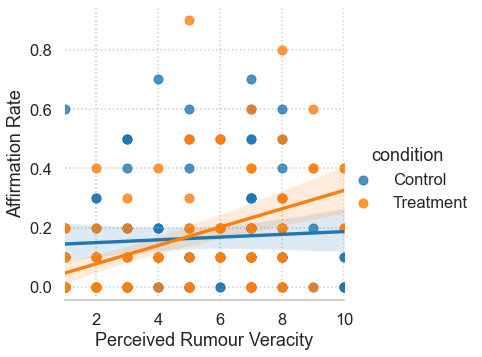

In [30]:
markers = {"High": "o", "Low": "x"}
g = sns.lmplot(x="veracityEstimate", 
               y="Affirms",
               hue="condition",
               data=reshare_rates)
g.set(xlabel="Perceived Rumour Veracity",ylabel="Affirmation Rate")
sns.despine(left=True)

**DISREGARD FROM HERE ON OUT**

*old statistical analyses that need to be refactored and moved to the system analysis script*

### $H_1$

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Add a random effect for the participant ID since there are repeated measures

md = smf.ols(f"Affirms ~ C(condition)*C(evidence)",#" + (1 | user_id) + age + C(educationLevel) + {affil_columns} + {sm_cols} + {gender_cols} + (1|PROLIFIC_ID)",
             reshare_rates).fit()
md.summary()

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Affirms   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.6750
Date:                Fri, 11 Jun 2021   Prob (F-statistic):              0.568
Time:                        12:43:08   Log-Likelihood:                 50.924
No. Observations:                 202   AIC:                            -93.85
Df Residuals:                     198   BIC:                            -80.61
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.1760      0.027      6.552      0.000       0.123       0.229
C(condition)[T.Treatment]                        0.0091      0.039      0.236      0.814      -0.067       0.085
C(evidence)[T.Low]                              -0.0232      0.037     -0.619      0.537      -0.097       0.051
C(condition)[T.Treatment]:C(evidence)[T.Low]    -0.0254      0.054     -0.475      0.636      -0.131       0.080
==============================================================================
Omnibus:                       48.869   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.385
Skew:                           1.347   Prob(JB):                     1.57e-17
Kurtosis:                       4.391   Cond. No.                         6.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
table = sm.stats.anova_lm(md, typ=2) # Type 2 Anova DataFrame
table

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sum_sq,df,F,PR(>F)
C(condition),0.000849,1.0,0.023530,0.878242
C(evidence),0.063918,1.0,1.771654,0.184708
C(condition):C(evidence),0.008127,1.0,0.225256,0.635587
Residual,7.143427,198.0,NaN,NaN


In [17]:
md2 = smf.mixedlm(f"Affirms ~ C(condition)*C(evidence)",#"+ age + C(educationLevel) + {affil_columns} + {sm_cols} + {gender_cols} + (1|PROLIFIC_ID)",
                     reshare_rates,
                     groups=reshare_rates["user_id"]).fit()
md2.summary()

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Mixed Linear Model Regression Results
=======================================================================================
Model:                        MixedLM            Dependent Variable:            Affirms
No. Observations:             202                Method:                        REML   
No. Groups:                   109                Scale:                         0.0194 
Min. group size:              1                  Log-Likelihood:                51.2700
Max. group size:              2                  Converged:                     Yes    
Mean group size:              1.9                                                      
---------------------------------------------------------------------------------------
                                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------
Intercept                                     0.175    0.027  6.603 0.000  0.123  0.227
C(condition)[T.Treatment]                     0.011    0.038  0.300 0.764 -0.063  0.086
C(evidence)[T.Low]                           -0.020    0.028 -0.728 0.467 -0.075  0.034
C(condition)[T.Treatment]:C(evidence)[T.Low] -0.033    0.040 -0.829 0.407 -0.112  0.045
Group Var                                     0.017    0.039                           
=======================================================================================

"""